<a href="https://colab.research.google.com/github/Abdullahbrsn69/Machine-Learning-Projects/blob/main/Titanic_Dataset_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project, I did pre-processing, visualization and modeling for survival analysis for the Kaggle Titanic dataset. An understandable project for everyone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
df = pd.read_csv('Titanic-Dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Preprocessing**

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True) # Since there was a lot of missing data in the age column, I filled it in with the median of the age column

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Since there was little missing data, I filled it in with mode (the most recurring item).

df['Cabin'].fillna('Unknown', inplace=True)

df['Fare'].fillna(df['Fare'].median(), inplace=True)

<ipython-input-17-a780c606830b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # Since there was a lot of missing data in the age column, I filled it in with the median of the age column
<ipython-input-17-a780c606830b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [19]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # We converted it to digital for modeling

df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}) # Same thing


df['Cabin'] = df['Cabin'].apply(lambda x: x[0])

df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])

In [20]:
# remove unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

**Feature Extraction**

In [21]:
# Create to family size column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create to alone explorer
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

**Visualization**

In [25]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Matplotlib stilini ayarla
plt.style.use('ggplot')

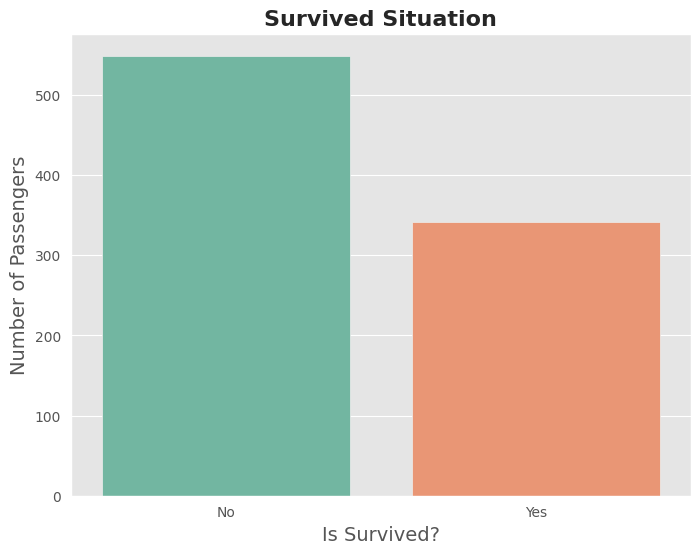

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, hue='Survived', palette='Set2', legend=False)
plt.title('Survived Situation', fontsize=16, fontweight='bold')
plt.xlabel('Is Survived?', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

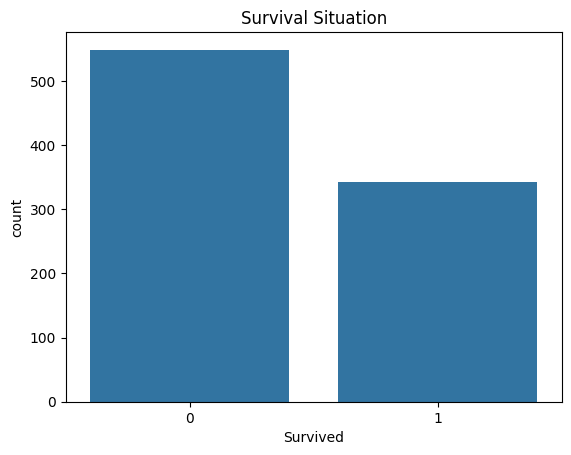

In [22]:
sns.countplot(x = 'Survived', data=df)
plt.title('Survival Situation')
plt.show()

<ipython-input-28-ab50ef0929e3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm', ci=None)
<ipython-input-28-ab50ef0929e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm', ci=None)


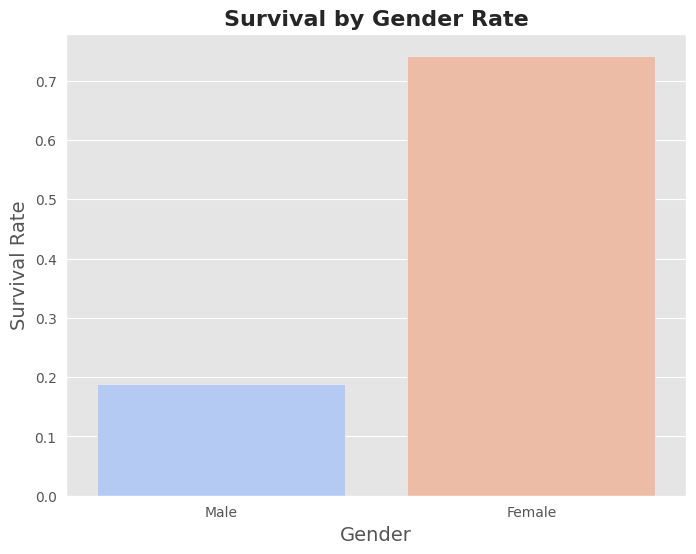

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm', ci=None)
plt.title('Survival by Gender Rate', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

<ipython-input-30-b8c6ae1ce73a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='magma')


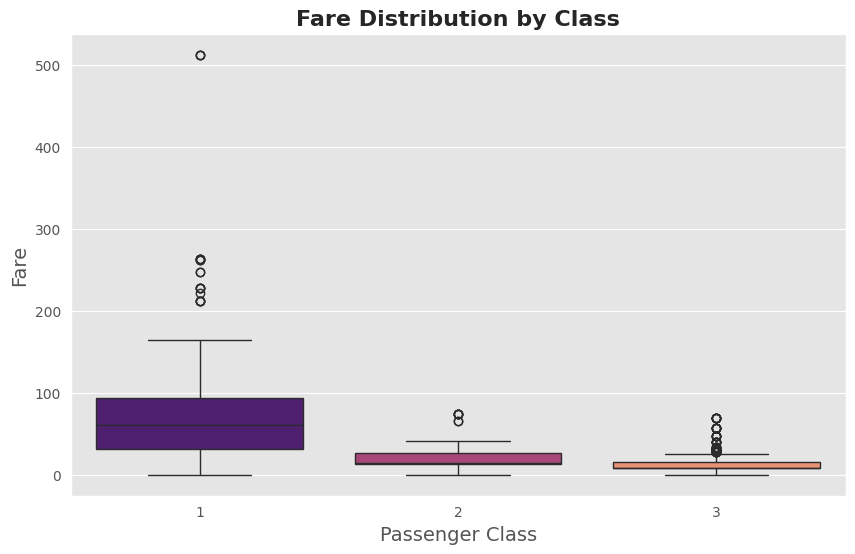

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='magma')
plt.title('Fare Distribution by Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.show()

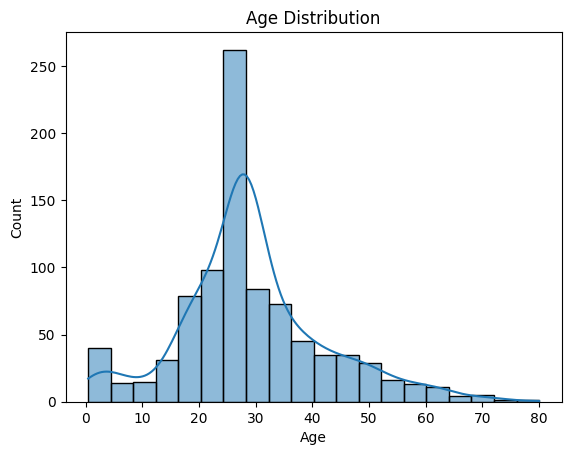

In [23]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

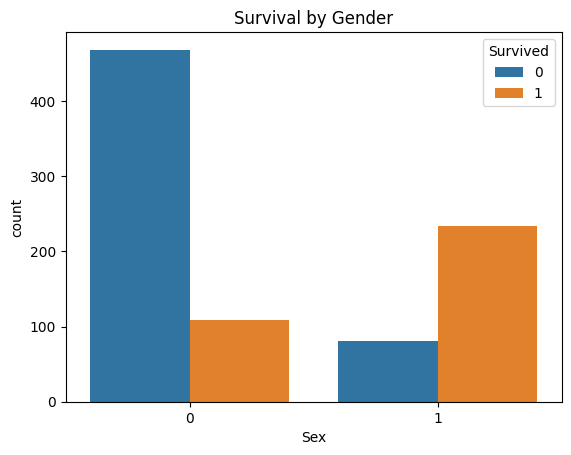

In [24]:
sns.countplot(x = 'Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

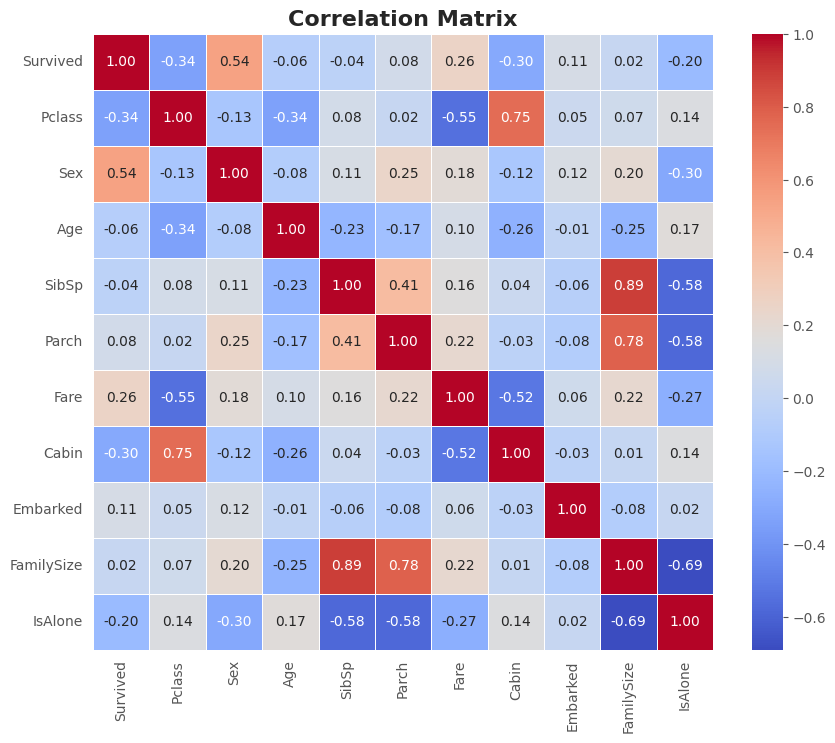

In [31]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

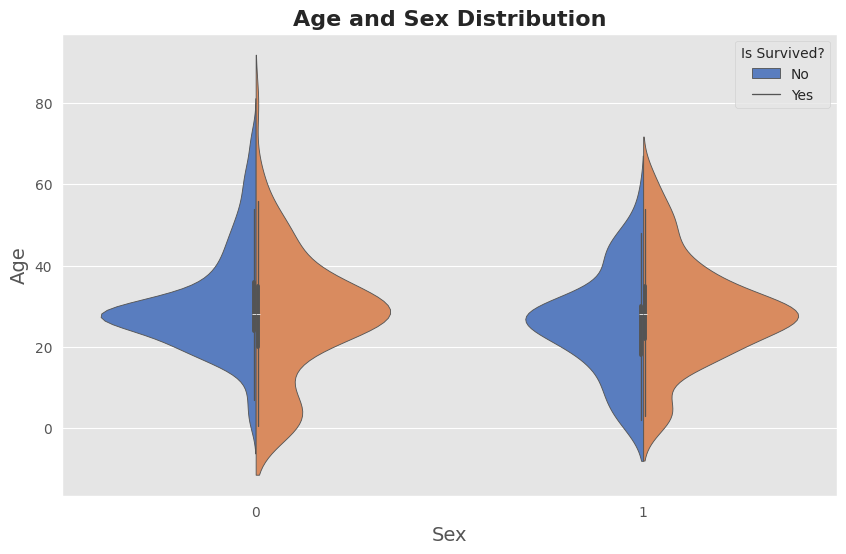

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=df, hue='Survived', split=True, palette='muted')
plt.title('Age and Sex Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Is Survived?', labels=['No', 'Yes'])
plt.show()

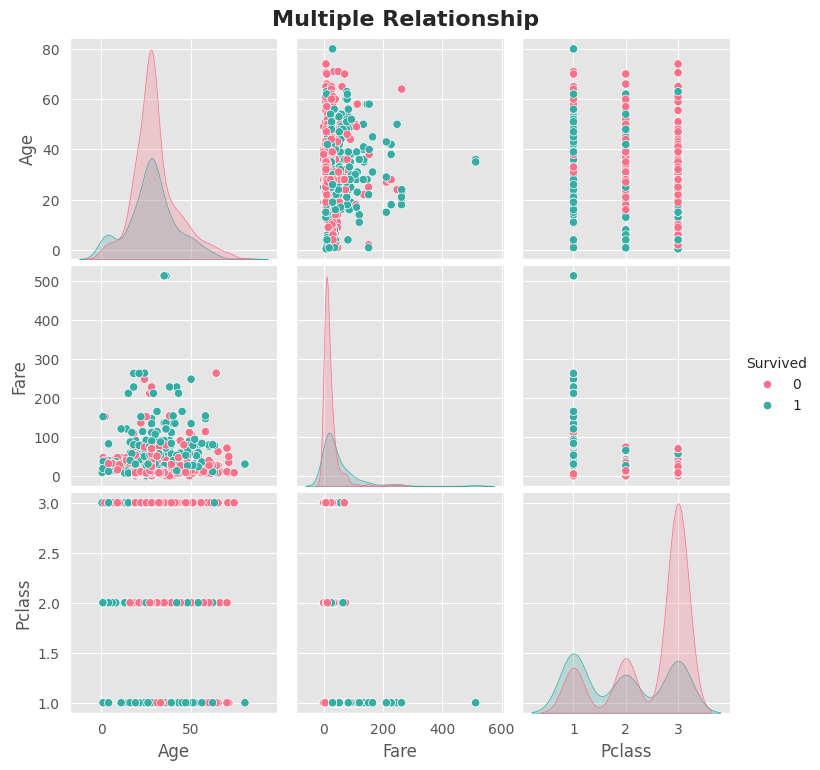

In [33]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='husl')
plt.suptitle('Multiple Relationship', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Feature Engineering and  Feature Extraction**

In [34]:
X = df.drop('Survived', axis=1)
y = df['Survived']


# Choose the best features
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X,y)


selected_features = X.columns[selector.get_support()]
print('Selected Features: ', selected_features)

Selected Features:  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'FamilySize', 'IsAlone'],
      dtype='object')


In [35]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

**Models**

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Metrics
print("Random Forest Metrikleri:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Metrikleri:
Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC AUC Score: 0.7954311454311453
Confusion Matrix:
 [[89 16]
 [19 55]]


In [37]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Metrikleri hesapla
print("Gradient Boosting Metrikleri:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Metrikleri:
Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1 Score: 0.7777777777777778
ROC AUC Score: 0.8117117117117117
Confusion Matrix:
 [[91 14]
 [18 56]]


In [38]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Metrikleri hesapla
print("SVM Metrikleri:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Metrikleri:
Accuracy: 0.659217877094972
Precision: 0.7407407407407407
Recall: 0.2702702702702703
F1 Score: 0.39603960396039606
ROC AUC Score: 0.6018018018018018
Confusion Matrix:
 [[98  7]
 [54 20]]


In [39]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrikleri hesapla
print("Logistic Regression Metrikleri:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Metrikleri:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8001930501930502
Confusion Matrix:
 [[90 15]
 [19 55]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


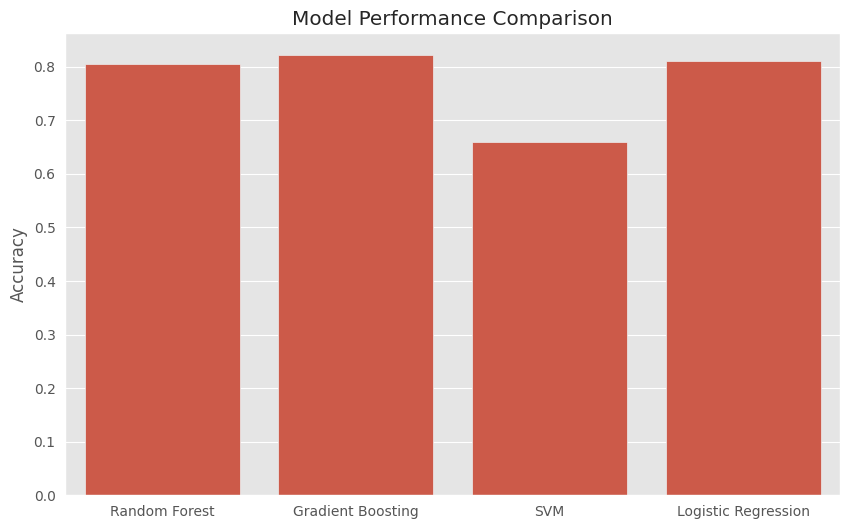

In [41]:
# Modellerin performanslarını karşılaştır
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Logistic Regression']
accuracy_scores = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()

<ipython-input-42-25891b2e1b12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


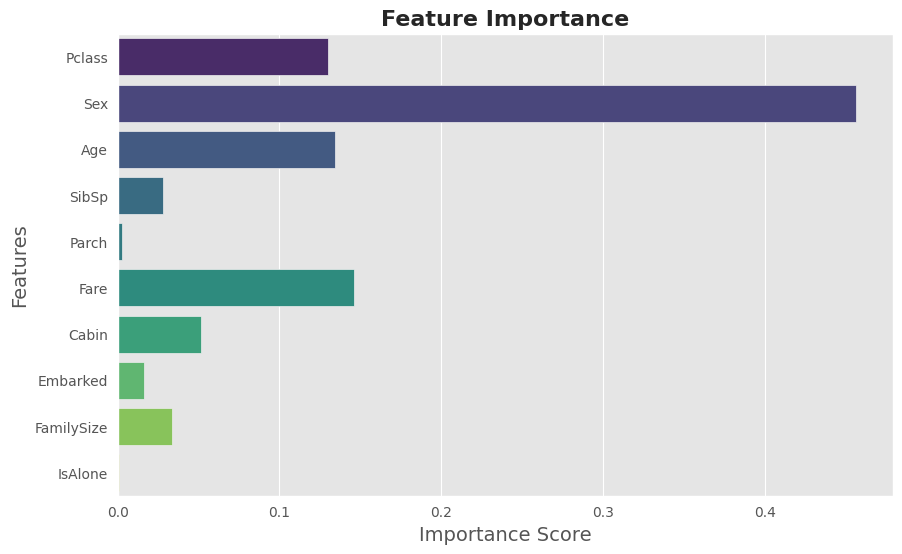

In [42]:
# Feature Visualization for Gradient Boosting
importances = gb.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()